In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importation et analyse des données

In [68]:
data = pd.read_csv('letters.csv')

In [69]:
data.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784,label
0,1.0,1.0,1.0,0.910714,0.285714,0.229592,0.0,0.0,0.0,0.000000,...,1.0,1.000000,1.000,1.0000,0.400510,0.035714,0.000,0.000,0.000,2
1,0.0,0.0,0.0,0.000000,0.044643,0.098214,0.0,0.0,0.0,0.000000,...,1.0,1.000000,1.000,0.3125,0.044643,0.000000,0.000,0.000,0.000,2
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.109056,...,1.0,0.267857,0.000,0.0000,0.000000,0.000000,0.000,0.000,0.000,G
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.0,1.000000,1.000,1.0000,1.000000,1.000000,1.000,1.000,1.000,2
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.0,0.125000,0.125,0.1250,0.125000,0.125000,0.125,0.125,0.125,G


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Columns: 785 entries, pixel_1 to label
dtypes: float64(784), object(1)
memory usage: 60.1+ MB


On voit qu'il y a 32 classes différentes dans l'ensemble de données

In [71]:
len(data['label'].unique())

32

In [72]:
np.sort(data['label'].unique())

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

Création d'un dictionnaire qui servira à faire le 'mapping' pour transformer tout les étiquettes en chiffres puisque les algorithmes prédisent des chiffres.
Il sera donc plus facile faire des analyses par la suite si on a des séries conséquentes.

In [73]:
label_mapping = {}
counter = 0
for label in np.sort(data['label'].unique()):
    label_mapping[label] = counter
    counter += 1

print(label_mapping)

{'2': 0, '3': 1, '4': 2, '5': 3, '6': 4, '7': 5, '8': 6, '9': 7, 'A': 8, 'B': 9, 'C': 10, 'D': 11, 'E': 12, 'F': 13, 'G': 14, 'H': 15, 'J': 16, 'K': 17, 'L': 18, 'M': 19, 'N': 20, 'P': 21, 'Q': 22, 'R': 23, 'S': 24, 'T': 25, 'U': 26, 'V': 27, 'W': 28, 'X': 29, 'Y': 30, 'Z': 31}


In [74]:
label_mapping_inversed = {v: k for k, v in label_mapping.items()}
print(label_mapping_inversed )

{0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: 'A', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'G', 15: 'H', 16: 'J', 17: 'K', 18: 'L', 19: 'M', 20: 'N', 21: 'P', 22: 'Q', 23: 'R', 24: 'S', 25: 'T', 26: 'U', 27: 'V', 28: 'W', 29: 'X', 30: 'Y', 31: 'Z'}


Regardons combien de chacun des caractères nous avons dans l'ensemble de données.
On voit que nous n'avons pas le même nombre d'image pour chacun des caractères.
Il sera donc préférable, lors de la séparation des données, de prendre cela en considération.

In [75]:
valueCounts = pd.DataFrame(data['label'].value_counts())

In [76]:
valueCounts = valueCounts.sort_values(by='label', ascending=False)

In [77]:
valueCounts

,label
5,346
E,342
W,334
Y,331
X,327
N,327
8,326
L,325
R,325
Q,323


In [78]:
valueCounts / len(data)

,label
5,0.034479
E,0.034081
W,0.033284
Y,0.032985
X,0.032586
N,0.032586
8,0.032486
L,0.032387
R,0.032387
Q,0.032187


### Séparation des données

In [79]:
# Mapping des labels
X = data.drop('label', axis=1)
y = data['label'].map(label_mapping)

In [80]:
# Puisque les classes n'ont pas le même nombre de données, j'utiliserai un Stratified shuffle split
# afin que l'ensemble d'entrainement et l'ensemble de test aient la même distribution
# Puisque l'ensemble de données est petit, j'utilserai 60% des données pour l'entrainement, 
# 20% pour la validation et 20% pour le test

# Séparation train/test 80/20
from sklearn.model_selection import StratifiedShuffleSplit

split_test = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split_test.split(X,y):
    X_train_original, X_test_original = X.iloc[train_index], X.iloc[test_index]
    y_train_original, y_test_original = y.iloc[train_index], y.iloc[test_index]

In [81]:
print(X_train_original.shape)
print(y_train_original.shape)
print(X_test_original.shape)
print(y_test_original.shape)

(8028, 784)
(8028,)
(2007, 784)
(2007,)


In [82]:
# Séparation train/validation 60/20

split_val = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, val_index in split_val.split(X_train_original,y_train_original):
    X_train_original, X_val_original = X_train_original.iloc[train_index], X_train_original.iloc[val_index]
    y_train_original, y_val_original = y_train_original.iloc[train_index], y_train_original.iloc[val_index]

In [83]:
print(X_train_original.shape)
print(y_train_original.shape)
print(X_val_original.shape)
print(y_val_original.shape)
print(X_test_original.shape)
print(y_test_original.shape)

(6021, 784)
(6021,)
(2007, 784)
(2007,)
(2007, 784)
(2007,)


# Modélisation

Pour ce qui est du traitement d'image, les réseaux de neurones convolutifs ont prouvé qu'ils étaient les plus performants.
Ceux-ci sont principalement plus performant dû au fait qu'ils prennent en considération la position des objets, et donc se qui se trouve aux alentours, lors de l'ajustement des paramètres du modèle, contraitement aux modèles plus basiques qui considèrent entièrement les pixels
d'une image. C'est pourquoi je choisis d'utiliser un réseau de neurones convolutif.
Pour l'exercice j'ai utilisé la structure de l'algorithme LeNet-5 auquel j'ai ajouté une couche de convolution (donne de meilleurs résultats).
Il y a certainement des structures plus complexes qui pourraient être plus performantes que celle-ci mais pour une question de temps de calcul, j'utiliserai celle-ci afin de pouvoir faire une certaine optimisation manuelle des hyperparamètres.

In [84]:
from keras import layers
from keras import models
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [85]:
# Transformer les labels en One-hot
y_train = pd.get_dummies(y_train_original)
y_val = pd.get_dummies(y_val_original)
y_test = pd.get_dummies(y_test_original)

In [86]:
# Changer les dimensions des données pour que ça fonctionne avec l'algorithme
X_train = X_train_original.values.reshape(X_train_original.shape[0],28,28,1)
X_val = X_val_original.values.reshape(X_val_original.shape[0],28,28,1)
X_test = X_test_original.values.reshape(X_test_original.shape[0],28,28,1)

In [87]:
X_train.shape

(6021, 28, 28, 1)

Paramètres : Nombre de filtres (3), taille du filtre (3), taille du pooling (2), 
             fonction d'activation (5), dropout(2), Nombre de neurones (2), optimisateur, taux d'apprentissage,
             nombre de epochs, batch_size
<br>
<br>
Nombre de filtres : (32,64,96), doit augmenter après chaque couche de convolution. Les multiples de 8,16,32 sont souvent utilisés alors j'ai tout simplement choisi cette série.
<br>
<br>
taille du filtre : (3, 3), taille standard
<br>
<br>
fonction d'activation : 'relu', reconnue comme étant très performante dans les CNN
<br>
<br>
dropout : 0.5 et 0.5, donne les meilleurs résultats après quelques tests manuels, également une valeur standard
<br>
<br>
Nombre de neurones : 64, simplement un multiple (plus élevé) que la couche d'output qui est de 32 neurones
<br>
<br>
Optimisateur : RMSprop, car couramment utilisé avec les CNN
<br>
<br>
taux d'apprentissage : 0.001, simplement une valeur standard pour cet hyperparamètre
<br>
<br>
Nombre de epochs : 100, car "l'accuracy" du modèle prend beaucoup de temps avant de se stabiliser
<br>
<br>
batch_size : 48, 64 overfit et 32 donne de moins bons résultats que 64
<br>

In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=48, validation_data = (X_val, y_val), verbose=1)

Train on 6021 samples, validate on 2007 samples
Epoch 1/100
6021/6021 [==============================] - 6s 1ms/step - loss: 3.3430 - acc: 0.0717 - val_loss: 2.7806 - val_acc: 0.2202
Epoch 2/100
6021/6021 [==============================] - 5s 823us/step - loss: 2.6704 - acc: 0.2141 - val_loss: 1.9415 - val_acc: 0.4230
Epoch 3/100
6021/6021 [==============================] - 5s 752us/step - loss: 2.1178 - acc: 0.3572 - val_loss: 1.4756 - val_acc: 0.5984
Epoch 4/100
6021/6021 [==============================] - 5s 760us/step - loss: 1.7641 - acc: 0.4629 - val_loss: 1.3413 - val_acc: 0.6099
Epoch 5/100
6021/6021 [==============================] - 5s 791us/step - loss: 1.5570 - acc: 0.5149 - val_loss: 1.0174 - val_acc: 0.7235
Epoch 6/100
6021/6021 [==============================] - 4s 732us/step - loss: 1.3796 - acc: 0.5665 - val_loss: 1.1042 - val_acc: 0.6667
Epoch 7/100
6021/6021 [==============================] - 4s 719us/step - loss: 1.2452 - acc: 0.6112 - val_loss: 0.8319 - val_acc: 0.

6021/6021 [==============================] - 4s 694us/step - loss: 0.2403 - acc: 0.9246 - val_loss: 0.4321 - val_acc: 0.9153
Epoch 61/100
6021/6021 [==============================] - 4s 718us/step - loss: 0.2531 - acc: 0.9243 - val_loss: 0.3928 - val_acc: 0.9198
Epoch 62/100
6021/6021 [==============================] - 4s 694us/step - loss: 0.2433 - acc: 0.9263 - val_loss: 0.4033 - val_acc: 0.9153
Epoch 63/100
6021/6021 [==============================] - 4s 706us/step - loss: 0.2475 - acc: 0.9258 - val_loss: 0.3873 - val_acc: 0.9193
Epoch 64/100
6021/6021 [==============================] - 4s 698us/step - loss: 0.2364 - acc: 0.9291 - val_loss: 0.3914 - val_acc: 0.9213
Epoch 65/100
6021/6021 [==============================] - 4s 721us/step - loss: 0.2396 - acc: 0.9248 - val_loss: 0.4121 - val_acc: 0.9008
Epoch 66/100
6021/6021 [==============================] - 4s 702us/step - loss: 0.2432 - acc: 0.9269 - val_loss: 0.3721 - val_acc: 0.9228
Epoch 67/100
6021/6021 [=======================

### Erreur de prédiction

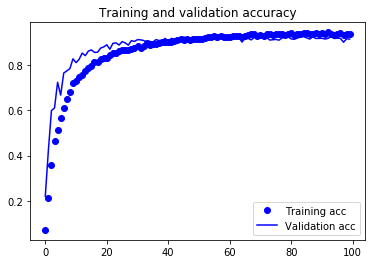

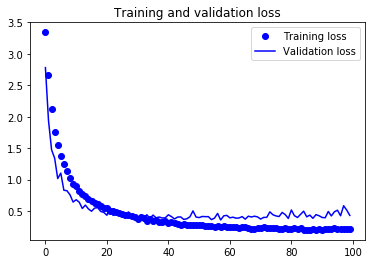

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [90]:
# Évaluation sur l'emsemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_acc))

2007/2007 [==============================] - 0s 226us/step
Test loss: 0.3586281709659308
Test accuracy: 0.9207772795216741


### Les caractères les plus souvent confondus par le modèle

In [91]:
# Prédictions des classes sur l'ensemble test
y_test_preds = model.predict_classes(X_test)
y_test_preds

array([ 6, 23, 15, ..., 30, 22, 11], dtype=int64)

In [92]:
# Matrice de confusion
conf_mx = confusion_matrix(y_test_original, y_test_preds)
conf_mx 

array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 60,  0, ...,  0,  0,  0],
       [ 0,  0, 61, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ..., 62,  1,  0],
       [ 0,  0,  0, ...,  0, 61,  0],
       [ 2,  0,  0, ...,  1,  0, 51]], dtype=int64)

In [93]:
# Somme de toutes les prédictions pour chacunes des classes
conf_mx.sum(axis=1)

array([64, 64, 64, 69, 58, 59, 65, 61, 61, 56, 58, 61, 68, 62, 65, 62, 59,
       63, 65, 57, 65, 63, 65, 65, 64, 60, 60, 63, 67, 65, 66, 63],
      dtype=int64)

In [94]:
# Pour vérifier que l'ordre des classes dans la matrice de confusion est bel et bien le même (c'est bien le cas)
y_test_original.value_counts().sort_index(axis=0)

0     64
1     64
2     64
3     69
4     58
5     59
6     65
7     61
8     61
9     56
10    58
11    61
12    68
13    62
14    65
15    62
16    59
17    63
18    65
19    57
20    65
21    63
22    65
23    65
24    64
25    60
26    60
27    63
28    67
29    65
30    66
31    63
Name: label, dtype: int64

In [95]:
# Diagonale de la matrice de confusion: représente le nombre de fois que le modèle
# a bien identifié chacune des classes respectives
# Ici on voit le nombre de fois que l'algorithme a mal prédit chacune des classes
# Les classes 10, 12, 18 et 31 (au-dessus de 15%) sont ceux dont l'algorithme a eu le plus de difficulté à prédire
# Ces classes représentent respectivement les caractères 'C', 'E', 'L' et 'Z'
y_test_original.value_counts().sort_index(axis=0) - conf_mx.diagonal()

0      1
1      4
2      3
3      7
4      3
5      6
6      1
7      4
8      4
9      1
10     9
11     4
12    14
13     5
14     5
15     6
16     5
17     1
18    11
19     5
20     1
21     4
22     2
23     4
24     6
25     4
26     8
27     4
28     7
29     3
30     5
31    12
Name: label, dtype: int64

In [96]:
# Pourcentage d'images mal classifiées
1-conf_mx.diagonal() / y_test_original.value_counts().sort_index(axis=0)

0     0.015625
1     0.062500
2     0.046875
3     0.101449
4     0.051724
5     0.101695
6     0.015385
7     0.065574
8     0.065574
9     0.017857
10    0.155172
11    0.065574
12    0.205882
13    0.080645
14    0.076923
15    0.096774
16    0.084746
17    0.015873
18    0.169231
19    0.087719
20    0.015385
21    0.063492
22    0.030769
23    0.061538
24    0.093750
25    0.066667
26    0.133333
27    0.063492
28    0.104478
29    0.046154
30    0.075758
31    0.190476
Name: label, dtype: float64

In [97]:
# = pd.Series(y_val_preds)
# y_val_preds= lst.map(label_mapping_inversed)

### Même modèle avec augmentation des données

Ici, j'ai utilisé le même modèle. J'ai toutefois dû réduire l'effet du dropout en enlevant une couche afin de ne pas sur-régulariser le modèle.
<br>
Les résultats montrent que la combinaison des deux techniques donne d'encore meilleurs résultats.
<br>
On voit par contre que "l'accuracy" de l'ensemble de validation est toujours meilleur que celui d'entrainement. 
Cela est dû au fait que les distributions de l'ensemble d'entrainement et de validation ne sont pas les mêmes puisque l'ensemble
d'entrainement comprends des données modifiées afin de régulariser le modèle.

In [98]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(96, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64, activation='relu'))
#model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='softmax'))

model2.compile(optimizer='rmsprop', # can modify learning rate here optimizer=RMSprop(lr=0.001)
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
generator = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=False,)

batch_size = 48
gen_train = generator.flow(X_train, y_train, batch_size=batch_size)

Voici un exemple des images générées

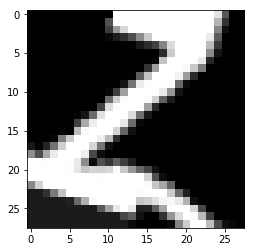

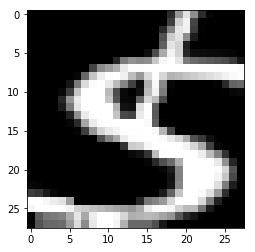

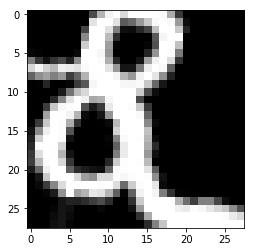

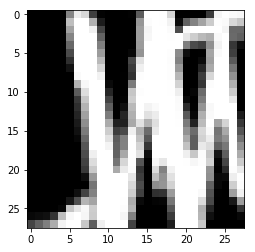

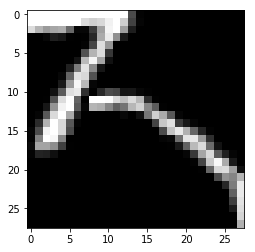

In [100]:
from keras.preprocessing import image

i = 0
for batch in generator.flow(X_train, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i ==5 :
        break

plt.show()

In [101]:
history2 = model2.fit_generator(generator=gen_train, steps_per_epoch=len(X_train)//batch_size, epochs=100,
                                validation_data=(X_val, y_val))

Epoch 1/100
125/125 [==============================] - 5s 41ms/step - loss: 3.2485 - acc: 0.1003 - val_loss: 2.4575 - val_acc: 0.2985
Epoch 2/100
125/125 [==============================] - 4s 35ms/step - loss: 2.4820 - acc: 0.2860 - val_loss: 1.6523 - val_acc: 0.5316
Epoch 3/100
125/125 [==============================] - 4s 35ms/step - loss: 2.0130 - acc: 0.4079 - val_loss: 1.3827 - val_acc: 0.5979
Epoch 4/100
125/125 [==============================] - 4s 34ms/step - loss: 1.7040 - acc: 0.5079 - val_loss: 1.0877 - val_acc: 0.6861
Epoch 5/100
125/125 [==============================] - 4s 36ms/step - loss: 1.5290 - acc: 0.5564 - val_loss: 0.9254 - val_acc: 0.7494
Epoch 6/100
125/125 [==============================] - 4s 34ms/step - loss: 1.3892 - acc: 0.5938 - val_loss: 0.8174 - val_acc: 0.7758
Epoch 7/100
125/125 [==============================] - 4s 34ms/step - loss: 1.2800 - acc: 0.6165 - val_loss: 0.8235 - val_acc: 0.7683
Epoch 8/100
125/125 [==============================] - 4s 35ms

Epoch 62/100
125/125 [==============================] - 4s 35ms/step - loss: 0.4488 - acc: 0.8624 - val_loss: 0.3252 - val_acc: 0.9263
Epoch 63/100
125/125 [==============================] - 4s 35ms/step - loss: 0.4311 - acc: 0.8698 - val_loss: 0.3116 - val_acc: 0.9273
Epoch 64/100
125/125 [==============================] - 4s 35ms/step - loss: 0.4599 - acc: 0.8654 - val_loss: 0.3459 - val_acc: 0.9263
Epoch 65/100
125/125 [==============================] - 4s 34ms/step - loss: 0.4208 - acc: 0.8677 - val_loss: 0.3482 - val_acc: 0.9203
Epoch 66/100
125/125 [==============================] - 4s 34ms/step - loss: 0.4402 - acc: 0.8693 - val_loss: 0.3171 - val_acc: 0.9292
Epoch 67/100
125/125 [==============================] - 4s 35ms/step - loss: 0.4359 - acc: 0.8686 - val_loss: 0.3210 - val_acc: 0.9317
Epoch 68/100
125/125 [==============================] - 4s 35ms/step - loss: 0.4042 - acc: 0.8740 - val_loss: 0.3486 - val_acc: 0.9297
Epoch 69/100
125/125 [==============================] -

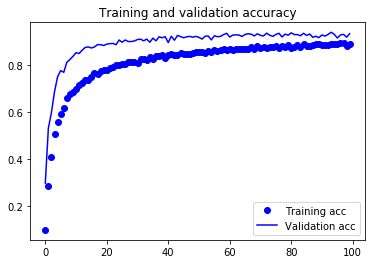

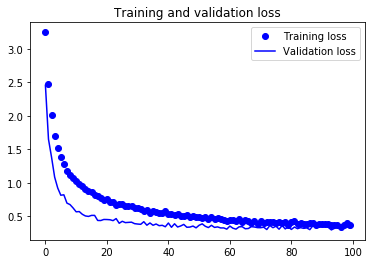

In [102]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [103]:
# Évaluation sur l'emsemble de test
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_acc))

2007/2007 [==============================] - 0s 217us/step
Test loss: 0.279998054715847
Test accuracy: 0.9322371700241249


### Les caractères les plus souvent confondus par le modèle (avec augmentation de données)

In [104]:
# Prédictions des classes sur l'ensemble test
y_test_preds = model2.predict_classes(X_test)
y_test_preds

array([ 6, 23, 16, ..., 17, 22, 11], dtype=int64)

In [105]:
# Matrice de confusion
#np.set_printoptions(threshold=np.inf)
conf_mx = confusion_matrix(y_test_original, y_test_preds)
conf_mx 

array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 63,  0, ...,  0,  0,  0],
       [ 0,  0, 62, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ..., 63,  0,  0],
       [ 0,  0,  0, ...,  0, 61,  0],
       [ 1,  0,  0, ...,  0,  0, 60]], dtype=int64)

In [106]:
# Somme de toutes les prédictions pour chacunes des classes
conf_mx.sum(axis=1)

array([64, 64, 64, 69, 58, 59, 65, 61, 61, 56, 58, 61, 68, 62, 65, 62, 59,
       63, 65, 57, 65, 63, 65, 65, 64, 60, 60, 63, 67, 65, 66, 63],
      dtype=int64)

In [107]:
# Pour vérifier que l'ordre des classes dans la matrice de confusion est bel et bien le même (c'est bien le cas)
y_test_original.value_counts().sort_index(axis=0)

0     64
1     64
2     64
3     69
4     58
5     59
6     65
7     61
8     61
9     56
10    58
11    61
12    68
13    62
14    65
15    62
16    59
17    63
18    65
19    57
20    65
21    63
22    65
23    65
24    64
25    60
26    60
27    63
28    67
29    65
30    66
31    63
Name: label, dtype: int64

In [108]:
# Diagonale de la matrice de confusion: représente le nombre de fois que le modèle
# a bien identifié chacune des classes respectives
# Ici on voit le nombre de fois que l'algorithme a mal prédit chacune des classes
# Les classes 5 et 16  (au-dessus de 15%) sont ceux dont l'algorithme a eu le plus de difficulté à prédire
# Ces classes représentent respectivement les caractères '4' et 'J'
y_test_original.value_counts().sort_index(axis=0) - conf_mx.diagonal()

0      1
1      1
2      2
3      3
4      0
5     20
6      1
7      2
8      2
9      0
10     8
11     4
12     7
13     9
14     1
15     7
16     9
17     2
18     8
19     4
20     2
21     4
22     2
23     4
24     4
25     4
26     4
27     5
28     6
29     2
30     5
31     3
Name: label, dtype: int64

In [109]:
conf_mx.diagonal()

array([63, 63, 62, 66, 58, 39, 64, 59, 59, 56, 50, 57, 61, 53, 64, 55, 50,
       61, 57, 53, 63, 59, 63, 61, 60, 56, 56, 58, 61, 63, 61, 60],
      dtype=int64)

In [110]:
# Pourcentage d'images mal classifiées
1-conf_mx.diagonal() / y_test_original.value_counts().sort_index(axis=0)

0     0.015625
1     0.015625
2     0.031250
3     0.043478
4     0.000000
5     0.338983
6     0.015385
7     0.032787
8     0.032787
9     0.000000
10    0.137931
11    0.065574
12    0.102941
13    0.145161
14    0.015385
15    0.112903
16    0.152542
17    0.031746
18    0.123077
19    0.070175
20    0.030769
21    0.063492
22    0.030769
23    0.061538
24    0.062500
25    0.066667
26    0.066667
27    0.079365
28    0.089552
29    0.030769
30    0.075758
31    0.047619
Name: label, dtype: float64

In [111]:
# = pd.Series(y_val_preds)
# y_val_preds= lst.map(label_mapping_inversed)

### EXTRA : Optimization des hyperparamètres

Si j'avais accès à une excellent capacité de calcul je pourrais utiliser le code suivant afin d'optimiser les hyperparamètres en utilisant une Grid Search ou un Randomized Search (plus rapide et efficace)

In [ ]:
def create_model(filtres, dropout1, dropout2, nb_neurones, taux_app):
    
    # Create model
    model = models.Sequential()
    model.add(layers.Conv2D(filtres, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(2*filtres, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(3*filtres, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout1))
    model.add(layers.Dense(nb_neurones, activation='relu'))
    model.add(layers.Dropout(dropout2))
    model.add(layers.Dense(nb_neurones, activation='relu'))
    model.add(layers.Dense(32, activation='softmax'))
   
    # Compile model
    model.compile(optimizer=RMSprop(lr=taux_app), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

if False:
    model = KerasClassifier(build_fn=create_model, verbose=0)

    filtres = [8, 16, 32, 48, 64]
    dropout1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    dropout2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    nb_neurones = [32, 64, 128, 256, 512]
    taux_app = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    batch_size = [10, 20, 40, 60, 80, 100]
    epochs = [25, 50, 75, 100]


    # Grid Search
    param_grid = {'filtres': filtres, 
                  'dropout1': dropout1, 
                  'dropout2': dropout2,
                  'nb_neurones': nb_neurones,
                  'taux_app': taux_app,
                  'batch_size': batch_size,
                  'epochs': epochs
                         }

    grid_search = GridSearchCV(model, param_grid, cv=3, verbose=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)
